In [45]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as mp
from pylab import show
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,LeakyReLU
from keras.utils import to_categorical
from keras.losses import SparseCategoricalCrossentropy
import cv2
from PIL import Image
import matplotlib.pyplot as plt
train = pd.read_csv("train.csv",)
test = pd.read_csv("test.csv")
countTrain=len(train)
countTest=len(test)

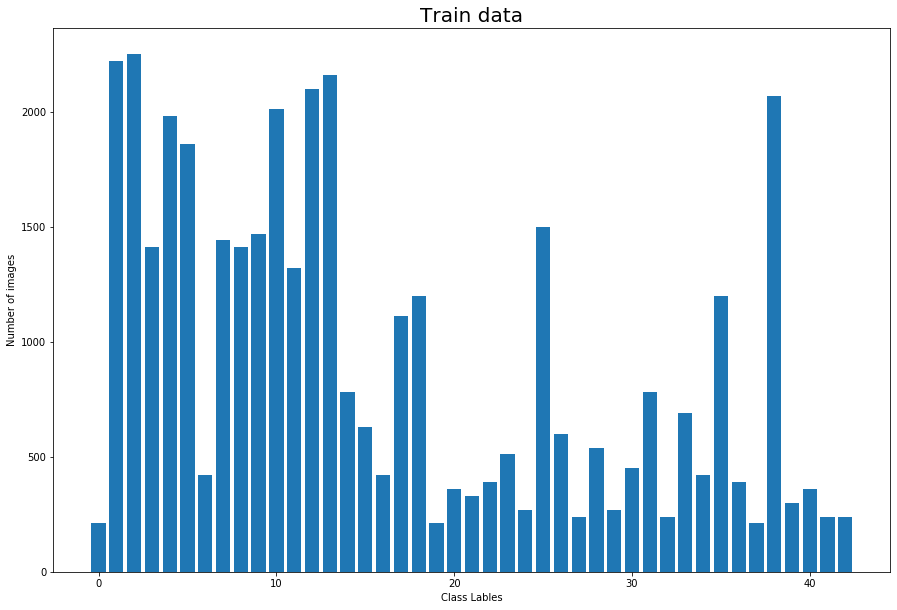

In [2]:
trainSet=np.array(train.groupby('ClassId').size())
mp.figure(figsize=(15,10))
mp.bar(range(0,43),trainSet)
mp.title("Train data", fontsize=20)
mp.xlabel("Class Lables")
mp.ylabel("Number of images")
show()

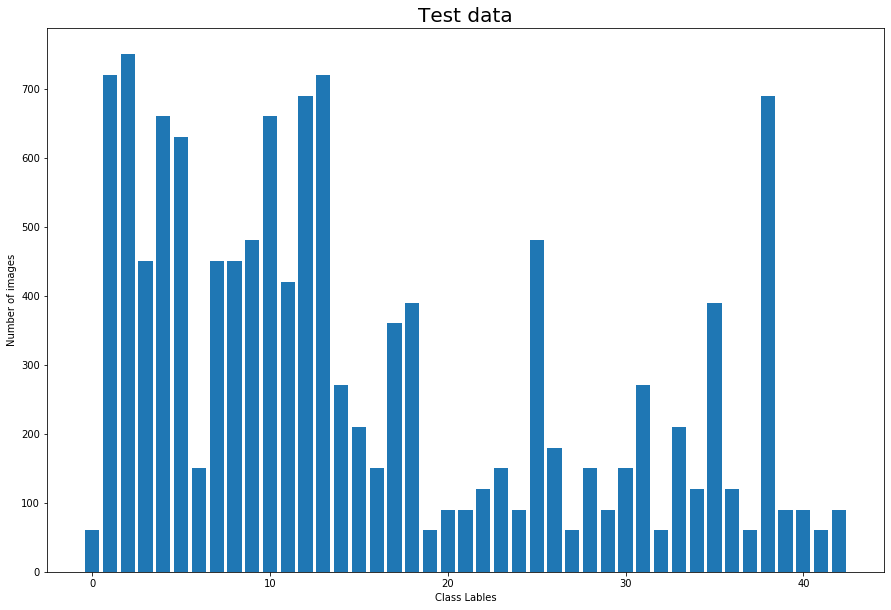

In [3]:
testSet=np.array(test.groupby('ClassId').size())
mp.figure(figsize=(15,10))
mp.bar(range(0,43),testSet)
mp.title("Test data", fontsize=20)
mp.xlabel("Class Lables")
mp.ylabel("Number of images")
show()

In [4]:
trainData=[]
trainLabels=[]

for index,row in train.iterrows() :
    trainLabels.append(row['ClassId'])
    trainData.append(np.array(np.array(Image.fromarray(cv2.imread(row['Path']), 'RGB').resize((40,40)))))

trainData=np.array(trainData)
trainLabels=np.array(trainLabels)

In [5]:
trainSplit=int(countTrain*0.8)
shuffel=np.arange(trainData.shape[0])
np.random.seed(43)
np.random.shuffle(shuffel)
trainData=trainData[shuffel]
trainLabels=trainLabels[shuffel]
(xTrain,xValidate)=(trainData[:trainSplit].astype('float32')/255),(trainData[trainSplit:].astype('float32')/255)
(yTrain,yValidate)=to_categorical(trainLabels[:trainSplit],43), to_categorical(trainLabels[trainSplit:],43)

In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=xTrain.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='relu'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=2,
validation_data=(xValidate, yValidate))

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
31367/31367 [==============================] - 234s 7ms/step - loss: 5.2066 - accuracy: 0.0538 - val_loss: 4.3691 - val_accuracy: 0.0559
Epoch 2/2
31367/31367 [==============================] - 210s 7ms/step - loss: 4.4516 - accuracy: 0.0603 - val_loss: 4.3170 - val_accuracy: 0.0525


In [46]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=xTrain.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation=LeakyReLU(alpha=0.1)))

#Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=2,
validation_data=(xValidate, yValidate))

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
31367/31367 [==============================] - 224s 7ms/step - loss: 8.2779 - accuracy: 0.0444 - val_loss: 9.3272 - val_accuracy: 0.0135
Epoch 2/2
31367/31367 [==============================] - 232s 7ms/step - loss: 8.8808 - accuracy: 0.0356 - val_loss: 9.1176 - val_accuracy: 0.0511


In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=xTrain.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='sigmoid'))

#Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=2,
validation_data=(xValidate, yValidate))

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
31367/31367 [==============================] - 211s 7ms/step - loss: 1.3416 - accuracy: 0.6305 - val_loss: 0.1807 - val_accuracy: 0.9633
Epoch 2/2
31367/31367 [==============================] - 217s 7ms/step - loss: 0.2057 - accuracy: 0.9488 - val_loss: 0.0592 - val_accuracy: 0.9875


In [43]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=xTrain.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=2,
validation_data=(xValidate, yValidate))

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
31367/31367 [==============================] - 229s 7ms/step - loss: 1.1827 - accuracy: 0.6592 - val_loss: 0.1398 - val_accuracy: 0.9648
Epoch 2/2
31367/31367 [==============================] - 232s 7ms/step - loss: 0.2336 - accuracy: 0.9269 - val_loss: 0.0514 - val_accuracy: 0.9872


In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=xTrain.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='softplus'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softplus'))

#Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=2,
validation_data=(xValidate, yValidate))

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
31367/31367 [==============================] - 219s 7ms/step - loss: 1.3283 - accuracy: 0.6138 - val_loss: 0.1737 - val_accuracy: 0.9577
Epoch 2/2
31367/31367 [==============================] - 217s 7ms/step - loss: 0.2712 - accuracy: 0.9205 - val_loss: 0.0729 - val_accuracy: 0.9801


In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=xTrain.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='softsign'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softsign'))

#Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=2,
validation_data=(xValidate, yValidate))

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
31367/31367 [==============================] - 217s 7ms/step - loss: 8.1237 - accuracy: 0.0117 - val_loss: 9.1833 - val_accuracy: 0.0055
Epoch 2/2
31367/31367 [==============================] - 204s 7ms/step - loss: 8.1126 - accuracy: 0.0099 - val_loss: 9.1834 - val_accuracy: 0.0079


In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=xTrain.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='tanh'))

#Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=2,
validation_data=(xValidate, yValidate))

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
31367/31367 [==============================] - 211s 7ms/step - loss: 8.1886 - accuracy: 0.0376 - val_loss: 8.6880 - val_accuracy: 0.0594
Epoch 2/2
31367/31367 [==============================] - 204s 6ms/step - loss: 7.5732 - accuracy: 0.0289 - val_loss: 7.2636 - val_accuracy: 0.0154


In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=xTrain.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='selu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='selu'))

#Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=2,
validation_data=(xValidate, yValidate))

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
31367/31367 [==============================] - 208s 7ms/step - loss: 8.4243 - accuracy: 0.0371 - val_loss: 10.3140 - val_accuracy: 0.0110
Epoch 2/2
31367/31367 [==============================] - 208s 7ms/step - loss: 8.2279 - accuracy: 0.0391 - val_loss: 10.4679 - val_accuracy: 0.0598


In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=xTrain.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='elu'))

#Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=2,
validation_data=(xValidate, yValidate))

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
31367/31367 [==============================] - 203s 6ms/step - loss: 7.7637 - accuracy: 0.0497 - val_loss: 5.9523 - val_accuracy: 0.0552
Epoch 2/2
31367/31367 [==============================] - 190s 6ms/step - loss: 7.7658 - accuracy: 0.0469 - val_loss: 10.2048 - val_accuracy: 0.0559


# Selected models

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=xTrain.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='softplus'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softplus'))

#Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=10,
validation_data=(xValidate, yValidate))

Train on 31367 samples, validate on 7842 samples
Epoch 1/10
31367/31367 [==============================] - 203s 6ms/step - loss: 1.3848 - accuracy: 0.5954 - val_loss: 0.1571 - val_accuracy: 0.9580
Epoch 2/10
31367/31367 [==============================] - 202s 6ms/step - loss: 0.2405 - accuracy: 0.9294 - val_loss: 0.0612 - val_accuracy: 0.9861
Epoch 3/10
31367/31367 [==============================] - 205s 7ms/step - loss: 0.1326 - accuracy: 0.9597 - val_loss: 0.0325 - val_accuracy: 0.9917
Epoch 4/10
31367/31367 [==============================] - 204s 7ms/step - loss: 0.0906 - accuracy: 0.9721 - val_loss: 0.0252 - val_accuracy: 0.9932
Epoch 5/10
31367/31367 [==============================] - 205s 7ms/step - loss: 0.0865 - accuracy: 0.9732 - val_loss: 0.0228 - val_accuracy: 0.9945
Epoch 6/10
31367/31367 [==============================] - 205s 7ms/step - loss: 0.0664 - accuracy: 0.9791 - val_loss: 0.0299 - val_accuracy: 0.9925
Epoch 7/10
31367/31367 [==============================] - 204s 

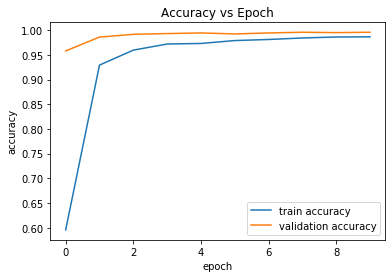

In [15]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [16]:
testData=[]
testLabels=[]

for index,row in test.iterrows() :
    testLabels.append(row['ClassId'])
    testData.append(np.array(np.array(Image.fromarray(cv2.imread(row['Path']), 'RGB').resize((40,40)))))

testData=np.array(testData).astype('float32')/255
testLabels=np.array(testLabels)

In [17]:
predictedLabels = model.predict_classes(testData)
print('The accuracy score for cnn with sigmoid activation for dense layer:')
print(accuracy_score(testLabels, predictedLabels))

The accuracy score for cnn with sigmoid activation for dense layer:
0.9741884402216944


Lable for test example: 14


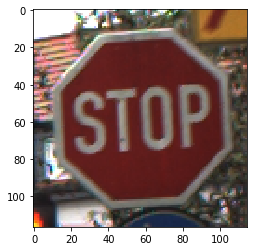

In [18]:
pil_im = Image.open(test.iloc[224]['Path'], 'r')
mp.imshow(np.asarray(pil_im))
print('Lable for test example: '+str(test.iloc[224]['ClassId']))

In [20]:
testVal=[]
testVal.append(np.array(np.array(Image.fromarray(cv2.imread(test.iloc[224]['Path']), 'RGB').resize((40,40)))))
testVal=np.array(testVal).astype('float32')/255
predictedLabels = model.predict_classes(testVal)
print('The predicted class label is:')
print(predictedLabels[0])

The predicted class label is:
14


In [21]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=xTrain.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='sigmoid'))

#Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=10,
validation_data=(xValidate, yValidate))

Train on 31367 samples, validate on 7842 samples
Epoch 1/10
31367/31367 [==============================] - 207s 7ms/step - loss: 1.5042 - accuracy: 0.5813 - val_loss: 0.1991 - val_accuracy: 0.9621
Epoch 2/10
31367/31367 [==============================] - 210s 7ms/step - loss: 0.2437 - accuracy: 0.9381 - val_loss: 0.0694 - val_accuracy: 0.9860
Epoch 3/10
31367/31367 [==============================] - 208s 7ms/step - loss: 0.1191 - accuracy: 0.9709 - val_loss: 0.0409 - val_accuracy: 0.9907
Epoch 4/10
31367/31367 [==============================] - 208s 7ms/step - loss: 0.0841 - accuracy: 0.9773 - val_loss: 0.0258 - val_accuracy: 0.9949
Epoch 5/10
31367/31367 [==============================] - 217s 7ms/step - loss: 0.0621 - accuracy: 0.9833 - val_loss: 0.0192 - val_accuracy: 0.9949
Epoch 6/10
31367/31367 [==============================] - 209s 7ms/step - loss: 0.0524 - accuracy: 0.9863 - val_loss: 0.0179 - val_accuracy: 0.9954
Epoch 7/10
31367/31367 [==============================] - 209s 

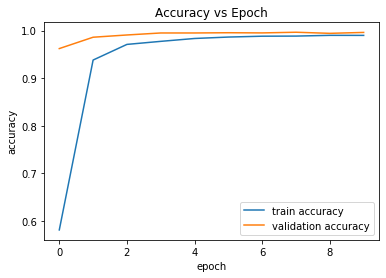

In [22]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [23]:
testData=[]
testLabels=[]

for index,row in test.iterrows() :
    testLabels.append(row['ClassId'])
    testData.append(np.array(np.array(Image.fromarray(cv2.imread(row['Path']), 'RGB').resize((40,40)))))

testData=np.array(testData).astype('float32')/255
testLabels=np.array(testLabels)

In [24]:
predictedLabels = model.predict_classes(testData)

print('The accuracy score for cnn with sigmoid activation for dense layer:')
print(accuracy_score(testLabels, predictedLabels))

The accuracy score for cnn with sigmoid activation for dense layer:
0.9698337292161521


Lable for test example: 0


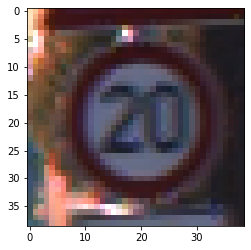

In [59]:
pil_im = Image.open(test.iloc[243]['Path'], 'r')
mp.imshow(np.asarray(pil_im))
print('Lable for test example: '+str(test.iloc[243]['ClassId']))

In [60]:
testVal=[]
testVal.append(np.array(np.array(Image.fromarray(cv2.imread(test.iloc[243]['Path']), 'RGB').resize((40,40)))))
testVal=np.array(testVal).astype('float32')/255
predictedLabels = model.predict_classes(testVal)
print('The predicted class label is:')
print(predictedLabels[0])

The predicted class label is:
13


In [61]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=xTrain.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=10,
validation_data=(xValidate, yValidate))

Train on 31367 samples, validate on 7842 samples
Epoch 1/10
31367/31367 [==============================] - 217s 7ms/step - loss: 1.3137 - accuracy: 0.6150 - val_loss: 0.2197 - val_accuracy: 0.9556
Epoch 2/10
31367/31367 [==============================] - 218s 7ms/step - loss: 0.2938 - accuracy: 0.9082 - val_loss: 0.1035 - val_accuracy: 0.9801
Epoch 3/10
31367/31367 [==============================] - 220s 7ms/step - loss: 0.1736 - accuracy: 0.9458 - val_loss: 0.0408 - val_accuracy: 0.9904
Epoch 4/10
31367/31367 [==============================] - 217s 7ms/step - loss: 0.1228 - accuracy: 0.9612 - val_loss: 0.0444 - val_accuracy: 0.9902
Epoch 5/10
31367/31367 [==============================] - 216s 7ms/step - loss: 0.1014 - accuracy: 0.9673 - val_loss: 0.0266 - val_accuracy: 0.9940
Epoch 6/10
31367/31367 [==============================] - 221s 7ms/step - loss: 0.0871 - accuracy: 0.9719 - val_loss: 0.0319 - val_accuracy: 0.9916
Epoch 7/10
31367/31367 [==============================] - 218s 

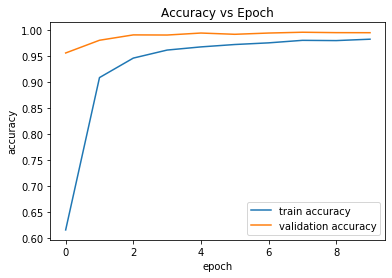

In [62]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [63]:
testData=[]
testLabels=[]

for index,row in test.iterrows() :
    testLabels.append(row['ClassId'])
    testData.append(np.array(np.array(Image.fromarray(cv2.imread(row['Path']), 'RGB').resize((40,40)))))

testData=np.array(testData).astype('float32')/255
testLabels=np.array(testLabels)

In [64]:
predictedLabels = model.predict_classes(testData)

print('The accuracy score for cnn with softmax activation for dense layer:')
print(accuracy_score(testLabels, predictedLabels))

The accuracy score for cnn with softmax activation for dense layer:
0.9644497228820269


Lable for test example: 18


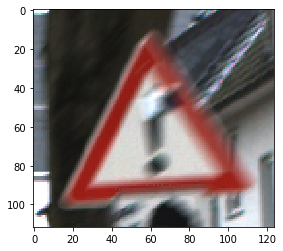

In [67]:
pil_im = Image.open(test.iloc[270]['Path'], 'r')
mp.imshow(np.asarray(pil_im))
print('Lable for test example: '+str(test.iloc[270]['ClassId']))

In [68]:
testVal=[]
testVal.append(np.array(np.array(Image.fromarray(cv2.imread(test.iloc[270]['Path']), 'RGB').resize((40,40)))))
testVal=np.array(testVal).astype('float32')/255
predictedLabels = model.predict_classes(testVal)
print('The predicted class label is:')
print(predictedLabels[0])

The predicted class label is:
18
